<a href="https://colab.research.google.com/github/harshbhanderi/DATA690-WANG/blob/master/Assignments/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [0]:
df = pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv', usecols=['CONTROL', 'MD_EARN_WNE_P10'])

In [102]:
df.head()

,CONTROL,MD_EARN_WNE_P10
0,1,31000
1,1,41200
2,2,39600
3,1,46700
4,1,27700


In [103]:
df['CONTROL'].value_counts()

3    2698
1    2102
2    2006
Name: CONTROL, dtype: int64

I don't know for which CONTROL variable there are public institutions, So I am guessing that CONTROL=1 is the public insitution and then filter the dataset according to it.

In [0]:
df_new = df[df['CONTROL'] == 1]

In [105]:
df_new.sample(5)

,CONTROL,MD_EARN_WNE_P10
2333,1,51000
3820,1,PrivacySuppressed
256,1,30900
2375,1,38400
2636,1,47100


In [106]:
# There are some PrivacySupressed values in MD_EARN_WNE_P10 column , So I am ready to remove all null values and zeroes with that.

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 6805
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CONTROL          2102 non-null   int64 
 1   MD_EARN_WNE_P10  1955 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [107]:
df_new['MD_EARN_WNE_P10'] = pd.to_numeric(df_new['MD_EARN_WNE_P10'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 6805
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONTROL          2102 non-null   int64  
 1   MD_EARN_WNE_P10  1853 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.3 KB


In [118]:
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 6615
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONTROL          1853 non-null   int64  
 1   MD_EARN_WNE_P10  1853 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 43.4 KB


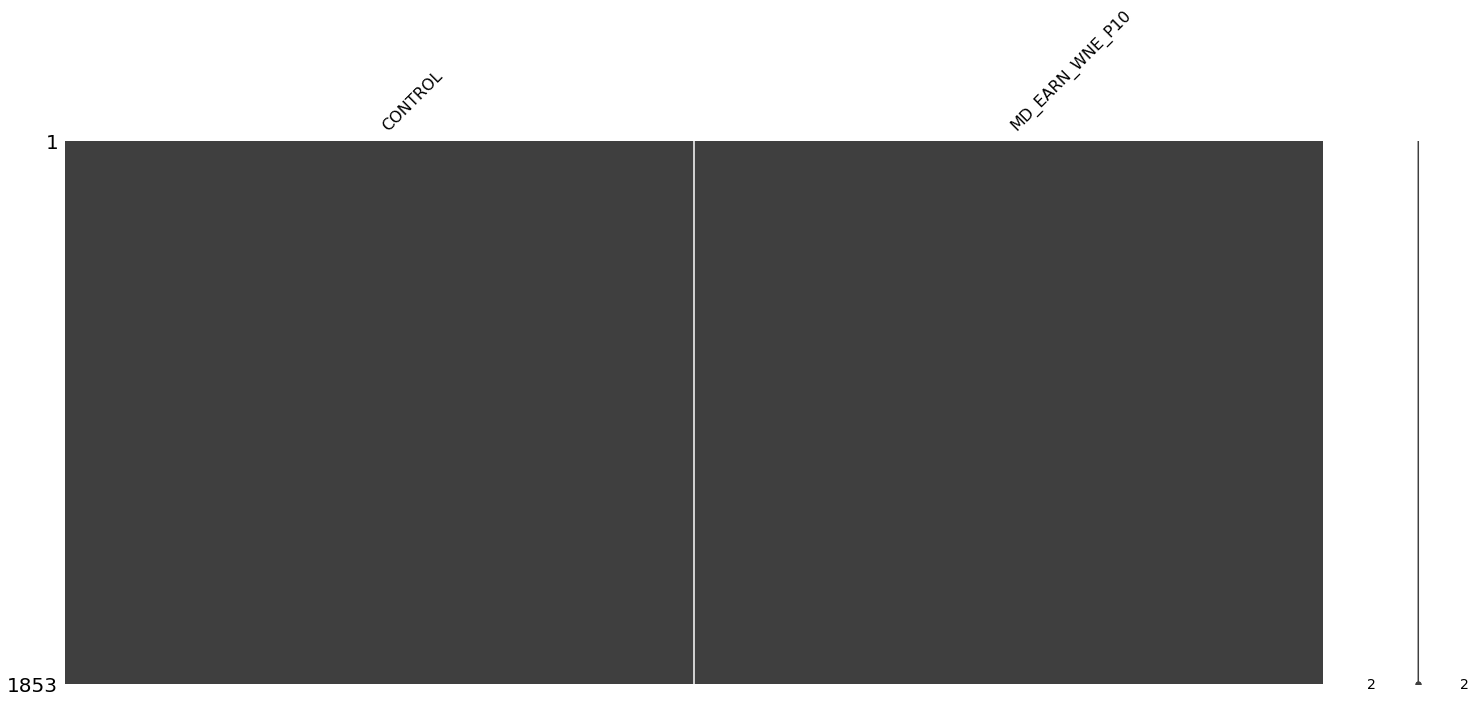

In [119]:
import missingno as msno
msno.matrix(df_new)

In [0]:
df_sample_50 = df_new.sample(50)

In [125]:
df_sample_50.describe()

,CONTROL,MD_EARN_WNE_P10
count,50.0,50.000000
mean,1.0,35710.000000
std,0.0,9405.648542
min,1.0,18700.000000
25%,1.0,29475.000000
50%,1.0,33900.000000
75%,1.0,40900.000000
max,1.0,71900.000000


In [169]:
sample_mean_50 = df_sample_50["MD_EARN_WNE_P10"].mean()
sample_mean_50

35710.0

In [170]:
sample_std_dev = df_sample_50["MD_EARN_WNE_P10"].std()
sample_std_dev

9405.648541690038

In [171]:
# let's calculate the standard error first 
# Since we assume we don't know the population standard deviation, we use sample standard deviation as an estimate

std_err = sample_std_dev / math.sqrt(50)       # standard error
std_err

1330.1595730572774

In [172]:
sample_mean

35079.0

In [173]:
# Calculate 68% Confidence Interval (CI) - one standard error from the population mean
# 68% chances the population mean is within the sample_mean (+ or -) the standard error (SE)

LCL_68 = sample_mean_50 -  std_err
UCL_68 = sample_mean_50 +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  34379.84
Upper confidence limit at 68% confidence level =  37040.16


In [174]:
# Calculate 95% Confidence Interval (CI) - one standard error from the population mean
# 90% chances the population mean is within the sample_mean + or - 2 * the standard error (SE)

LCL_95 = sample_mean_50 -  2 * std_err
UCL_95 = sample_mean_50 +  2 * std_err

print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))

Lower confidence limit at 95% confidence level =  33049.68
Upper confidence limit at 95% confidence level =  38370.32


In [175]:
# Calculate 99.7% Confidence Interval (CI) - one standard error from the population mean
# 99.7% chances the population mean is within the sample_mean + or - 3 * the standard error (SE)

LCL_997 = sample_mean_50 -  3 * std_err
UCL_997 = sample_mean_50 +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  31719.52
Upper confidence limit at 99.7% confidence level =  39700.48


In [176]:
df_new['MD_EARN_WNE_P10'].mean()

36083.21640582839

In [177]:
df_sample_50['MD_EARN_WNE_P10'].mean()

35710.0

In [178]:
print('Population mean : ', round(df_new['MD_EARN_WNE_P10'].mean(), 2))
print('Sample 50 mean : ', sample_mean_50)
print('Difference Between Population mean and Sample mean :', round(df_new['MD_EARN_WNE_P10'].mean() - sample_mean_50, 2))

Population mean :  36083.22
Sample 50 mean :  35710.0
Difference Between Population mean and Sample mean : 373.22


And It seems that population mean of 36083.21 is falling within in all confidence levels

--------------------------

In [0]:
df_sample_100 = df_new.sample(100)

In [155]:
df_sample_100.describe()

,CONTROL,MD_EARN_WNE_P10
count,100.0,100.00000
mean,1.0,35079.00000
std,0.0,8038.27077
min,1.0,19600.00000
25%,1.0,29900.00000
50%,1.0,34100.00000
75%,1.0,39150.00000
max,1.0,62500.00000


In [180]:
sample_mean_100 = df_sample_100["MD_EARN_WNE_P10"].mean()
sample_mean_100

35577.0

In [157]:
sample_std_dev = df_sample_100["MD_EARN_WNE_P10"].std()
sample_std_dev

8038.270769866923

In [158]:
# let's calculate the standard error first 
# Since we assume we don't know the population standard deviation, we use sample standard deviation as an estimate

std_err = sample_std_dev / math.sqrt(50)       # standard error
std_err

1136.7831540773022

In [181]:
sample_mean_100

35577.0

In [182]:
# Calculate 68% Confidence Interval (CI) - one standard error from the population mean
# 68% chances the population mean is within the sample_mean (+ or -) the standard error (SE)

LCL_68 = sample_mean_100 -  std_err
UCL_68 = sample_mean_100 +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  34246.84
Upper confidence limit at 68% confidence level =  36907.16


In [183]:
# Calculate 95% Confidence Interval (CI) - one standard error from the population mean
# 90% chances the population mean is within the sample_mean + or - 2 * the standard error (SE)

LCL_95 = sample_mean_100 -  2 * std_err
UCL_95 = sample_mean_100 +  2 * std_err

print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))

Lower confidence limit at 95% confidence level =  32916.68
Upper confidence limit at 95% confidence level =  38237.32


In [185]:
# Calculate 99.7% Confidence Interval (CI) - one standard error from the population mean
# 99.7% chances the population mean is within the sample_mean + or - 3 * the standard error (SE)

LCL_997 = sample_mean_100 -  3 * std_err
UCL_997 = sample_mean_100 +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  31586.52
Upper confidence limit at 99.7% confidence level =  39567.48


In [163]:
df_new['MD_EARN_WNE_P10'].mean()

36083.21640582839

In [164]:
df_sample_100['MD_EARN_WNE_P10'].mean()

35079.0

In [186]:
print('Population mean : ', round(df_new['MD_EARN_WNE_P10'].mean(), 2))
print('Sample 100 mean : ', sample_mean_100)
print('Difference Between Population mean and Sample mean :', round(df_new['MD_EARN_WNE_P10'].mean() - sample_mean_100, 2))

Population mean :  36083.22
Sample 100 mean :  35577.0
Difference Between Population mean and Sample mean : 506.22


And It seems that population mean of 36083.21 is falling within in all confidence levels

--------------------------------------



- Population mean : 36083.22
- Sample 50 mean :  35710.0
- Sample 100 mean : 35577.0

---------------------------

### Comparision between 68% Confidence level

- Sample 50 : [34379.84, 37040.16]
- Sample 100 : [33942.22, 36215.78]

---------------------------

### Comparision between 95% Confidence level

- Sample 50 : [33049.68, 38370.32]
- Sample 100 : [32916.68, 38237.32]

----------------------------
### Comparision between 99.7% Confidence level

- Sample 50 : [31719.52, 39700.48]
- Sample 100 : [31586.52, 39567.48]


After comparing all the confidence level between sample 50 and 100, I can say that at 99.7% confidence level almost confidence interval(CI) have very close value as compared to 68% confidence level.

That means 